In [1]:
import function_book as f
import pandas as pd

In [2]:
import numpy as np
import baostock as bs

In [4]:
step1_file= "tmt_stock_basic.csv"
step2_file = "TMT_stock_price.csv"
step3_file = "TMT_stock_details.csv"
step4_file = "TMT_stock_results.csv"


start_date_str = "2018-04-02" # start date of backing test 
end_date_str = "2020-04-30" # end date of backing test
ave_step = 5 # the days is calculation average close.average pbMRQ.
quarter_date_list = f.get_quarter_date_list(start_date_str,end_date_str)
#["2019-04-01","2019-07-01","2019-10-01","2020-01-01","2020-04-01","2020-07-01"]
# quarter date during backing test period

In [5]:
stock_basic_df = pd.read_csv(step1_file, encoding='utf_8') 
f.generate_stock_price(stock_basic_df,start_date_str,end_date_str,ave_step,columns_str = "date,code,close,pbMRQ,isST")

login success!
sz.000021,sz.000063,sz.000066,sz.000100,sz.000503,sz.000586,sz.000733,sz.000793,sz.000836,sz.000917,sz.000938,sz.002073,sz.002093,sz.002115,sz.002148,sz.002151,sz.002152,sz.002181,sz.002195,sz.300017,sz.300027,sz.300058,sz.300205,sz.300392,sh.600060,sh.600088,sh.600601,sh.600770,sh.600839,sh.600880,sh.601999,logout success!


In [6]:
stock_basic_df.head(2)

,Unnamed: 0,code,code_name
0,0,sz.000021,深科技
1,1,sz.000063,中兴通讯


In [7]:
stock_price_df = pd.read_csv(step2_file, encoding='utf_8') 
f.generate_stock_details(stock_price_df,quarter_date_list)

login success!
2018-04-01,2018-07-01,2018-10-01,2019-01-01,2019-04-01,2019-07-01,2019-10-01,2020-01-01,logout success!


In [8]:
stock_price_df.head()

,date,code,close,pbMRQ,isST,ave_close,ave_pbMRQ,code_name
0,2018-04-10,sz.000021,8.56,2.167410,0,8.640,2.187666,深科技
1,2018-04-17,sz.000021,8.55,2.147845,0,8.750,2.201581,深科技
2,2018-04-24,sz.000021,9.65,2.424176,0,9.504,2.387499,深科技
3,2018-05-03,sz.000021,9.03,2.271039,0,9.312,2.340303,深科技
4,2018-05-10,sz.000021,8.84,2.223255,0,8.942,2.248908,深科技


In [9]:
prof_size = 3 #number of stocks select from the strategy
freq = False # false means, only rebalance weight when stocks changes
short = False
chunk_size = 3 # how many years data to simulate the weights

In [10]:
unsorted_df = pd.read_csv(step3_file,encoding='utf_8')
(selected_list,sselected_list) = f.get_famafrench_stocks(unsorted_df,prof_size,freq,short)
(stocks_id,start_opt_date,end_opt_date) = f.processing_selected_list(selected_list,chunk_size)

In [11]:
profolio = f.all_rebalance_weights(selected_list,chunk_size = 3)

In [24]:
import matplotlib.pyplot as plt
def result_ana(result):
    result['sum'] = result.sum(axis = 1)
    result = result.loc['2018-04-10':'2020-04-10']
    profit = result.iloc[-1]['sum']/ result.iloc[0]['sum']
    
    print("Annual return rate:",(np.sqrt(profit)-1)*100,"%, worst case:", result['sum'].min()/result['sum'][0],end = ',')
    '''
    sum_list = result['sum'].tolist()
    max_id = sum_list.index(result['sum'].max())
    min_val = result['sum'][max_id:].min()
    min_id = sum_list.index(min_val)
    print("回撤:",min_id-max_id,'days',(result['sum'].max() - min_val )/result['sum'].max())
    '''
    return plt.plot(np.arange(0,len(result),1),result['sum'])

login success!
['date', 'capital0', 'capital1', 'capital2']
0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,logout success!
Annual return rate: 76.93425633534841 %, worst case: 0.7481627674890846,

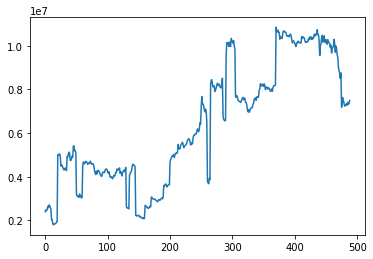

In [23]:
result = f.profolio_ana(profolio,prof_size)
result_ana(result.copy())